# Alignment Score

## merge

In [ ]:
ad_forAlignmentScore = ad.copy()

In [ ]:
sc.pp.highly_variable_genes(
    ad_forAlignmentScore, "sx", n_top_genes=5000, flavor="seurat_v3", batch_key="Batch"
)

In [ ]:
sc.pp.pca(ad_forAlignmentScore)

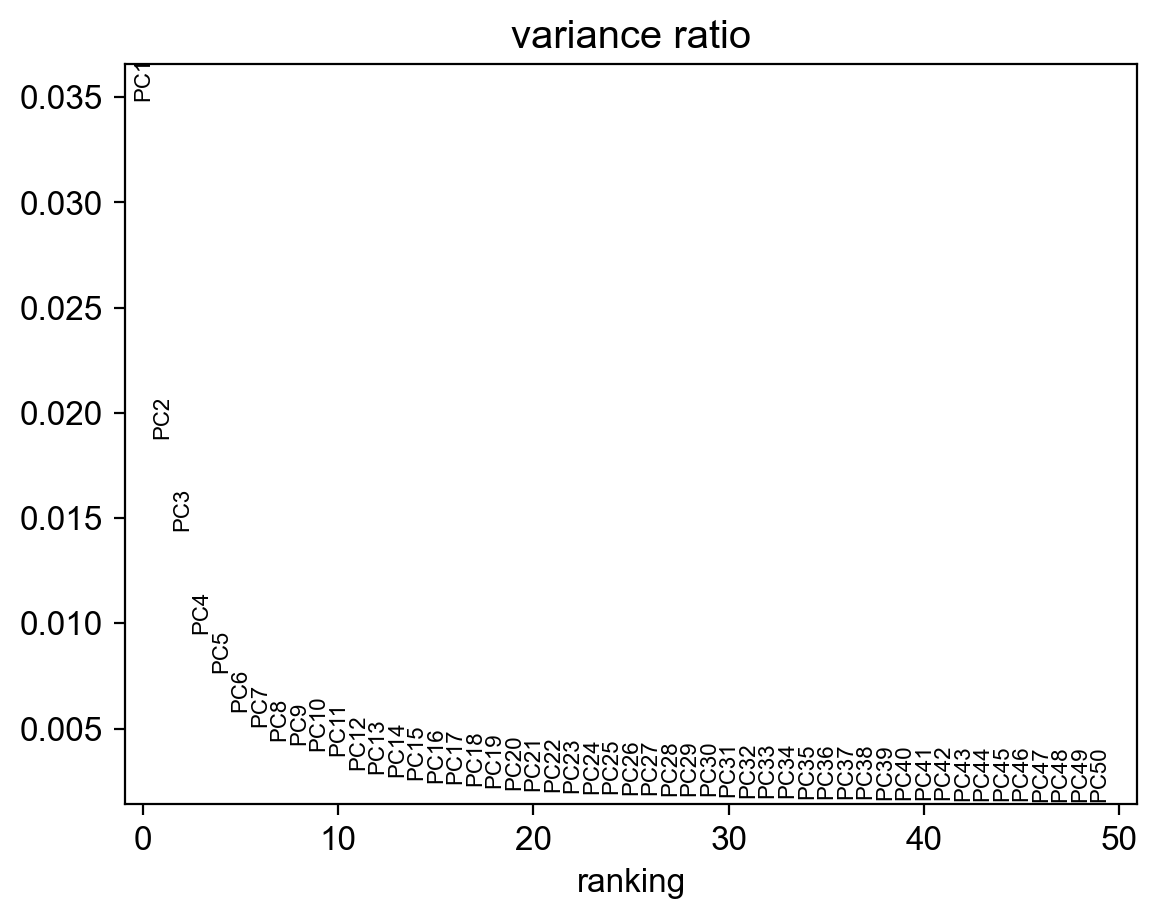

In [ ]:
sc.pl.pca_variance_ratio(ad_forAlignmentScore, 50)

In [ ]:
ad_forAlignmentScore.obsm["X_pca20"] = ad_forAlignmentScore.obsm["X_pca"][:, :20]

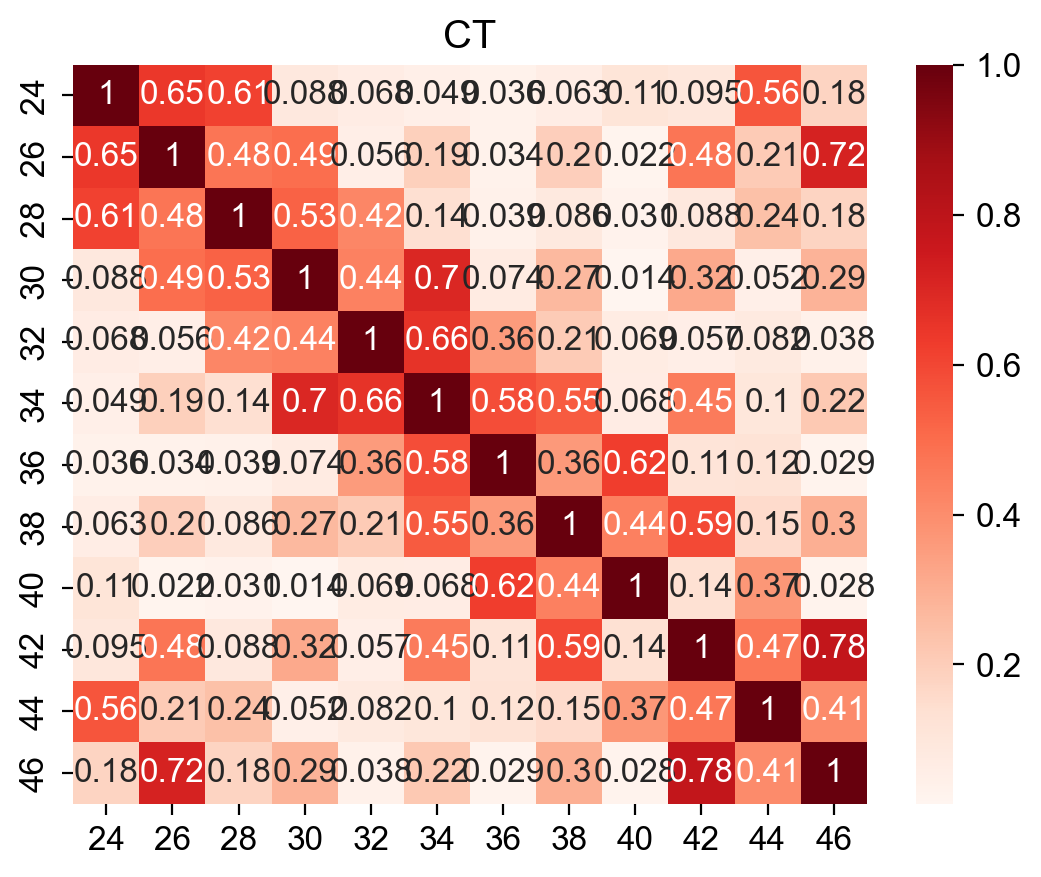

In [ ]:
df_alignScore, ax = singleCellTools.others.getAlignmentScore(
    ad_forAlignmentScore, "CT", "X_pca20"
)

In [ ]:
df_alignScore.index = range(24, 48, 2) >> F(list)
df_alignScore.columns = range(24, 48, 2) >> F(list)
df_alignScore = df_alignScore.iloc[::-1]

In [ ]:
F

jpy_tools.otherTools.F

In [ ]:
df_alignScore.index % 4 == 0


array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True])

In [ ]:
(df_alignScore.index % 4 == 0 ).tolist() >> F(lambda _: np.where(_, 'Batch 1', 'Batch 2'))

array(['Batch 2', 'Batch 1', 'Batch 2', 'Batch 1', 'Batch 2', 'Batch 1',
       'Batch 2', 'Batch 1', 'Batch 2', 'Batch 1', 'Batch 2', 'Batch 1'],
      dtype='<U7')

# plot core driver genes

In [ ]:
import scipy

In [ ]:
ad_mergeAllCt = singleCellTools.geneEnrichInfo._mergeData(ad, ["CT"], "sx")

In [ ]:
ad_mergeAllCt.obs["Batch"] = np.where(ad_mergeAllCt.obs["CT"].astype(int) % 4, "2", "1")

In [ ]:
singleCellTools.basic.initLayer(ad_mergeAllCt, total=1e6, logbase=2)

In [ ]:
ad_mergeAllCt.layers["normalize"] = np.exp2(ad_mergeAllCt.layers["normalize_log"]) - 1

In [ ]:
_df = (
    ad_mergeAllCt.to_df("normalize_log")
    .join(ad_mergeAllCt.obs[["Batch"]])
    .groupby(["Batch"])
    .apply(scipy.stats.zscore, axis=0)
)
ad_mergeAllCt.layers["zscore"] = _df

In [ ]:
_df = ad_mergeAllCt.to_df("normalize_log").apply(scipy.stats.zscore, axis=0)
ad_mergeAllCt.layers["zscore_oneBatch"] = _df

In [ ]:
ls_plotGenes = [
    "AT2G46830",
    "AT1G01060",
    "AT2G46790",
    "AT5G02810",
    "AT3G09600",
    "AT5G52660",
    "AT5G02840",
    "AT5G64170",
    "AT3G54500",
    "AT5G24470",
    "AT5G60100",
    "AT5G61380",
    "AT1G22770",
    "AT5G59570",
    "AT3G46640",
    "AT2G40080",
    "AT2G25930",
    'AT5G57360',
    'AT3G02780'
]
ls_plotNames = [
    "CCA1",
    "LHY",
    "PRR9",
    "PRR7",
    "RVE8",
    "RVE6",
    "RVE4",
    "LNK1",
    "LNK2",
    "PRR5",
    "PRR3",
    "TOC1",
    "GI",
    "BOA",
    "LUX",
    "ELF4",
    "ELF3",
    'ZTL',
    'IPP2'
]
dt_plotGenes = dict(zip(ls_plotNames, ls_plotGenes))
dt_plotGenes

{'CCA1': 'AT2G46830',
 'LHY': 'AT1G01060',
 'PRR9': 'AT2G46790',
 'PRR7': 'AT5G02810',
 'RVE8': 'AT3G09600',
 'RVE6': 'AT5G52660',
 'RVE4': 'AT5G02840',
 'LNK1': 'AT5G64170',
 'LNK2': 'AT3G54500',
 'PRR5': 'AT5G24470',
 'PRR3': 'AT5G60100',
 'TOC1': 'AT5G61380',
 'GI': 'AT1G22770',
 'BOA': 'AT5G59570',
 'LUX': 'AT3G46640',
 'ELF4': 'AT2G40080',
 'ELF3': 'AT2G25930',
 'ZTL': 'AT5G57360',
 'IPP2': 'AT3G02780'}

In [ ]:
dt_coreGene = {x:dt_coreGene[x] for x in dt_plotGenes.values() if x in dt_coreGene.keys()}
dt_coreGene

{'AT2G46830': 'CCA1',
 'AT1G01060': 'LHY',
 'AT2G46790': 'PRR9',
 'AT5G02810': 'PRR7',
 'AT3G09600': 'RVE8',
 'AT5G52660': 'RVE6',
 'AT5G02840': 'RVE4',
 'AT5G64170': 'LNK1',
 'AT3G54500': 'LNK2',
 'AT5G24470': 'PRR5',
 'AT5G60100': 'PRR3',
 'AT5G61380': 'TOC1',
 'AT1G22770': 'GI',
 'AT3G46640': 'LUX',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3',
 'AT5G57360': 'ZTL'}

In [ ]:
ls_symOrder = "CCA1, LHY, RVE4, RVE8, RVE6, LNK1, LNK2, PRR9, PRR7, PRR5, PRR3, TOC1, GI, LUX, ELF4, ELF3, ZTL".split(', ')
dt_plotGenes = {k:dt_plotGenes[k] for k in ls_symOrder}

In [ ]:
import importlib
importlib.reload(utils)

<module 'utils' from '/public/home/liuzj/notebooks/circadian/20221122/soupX/utils.py'>

<Figure size 640x480 with 0 Axes>

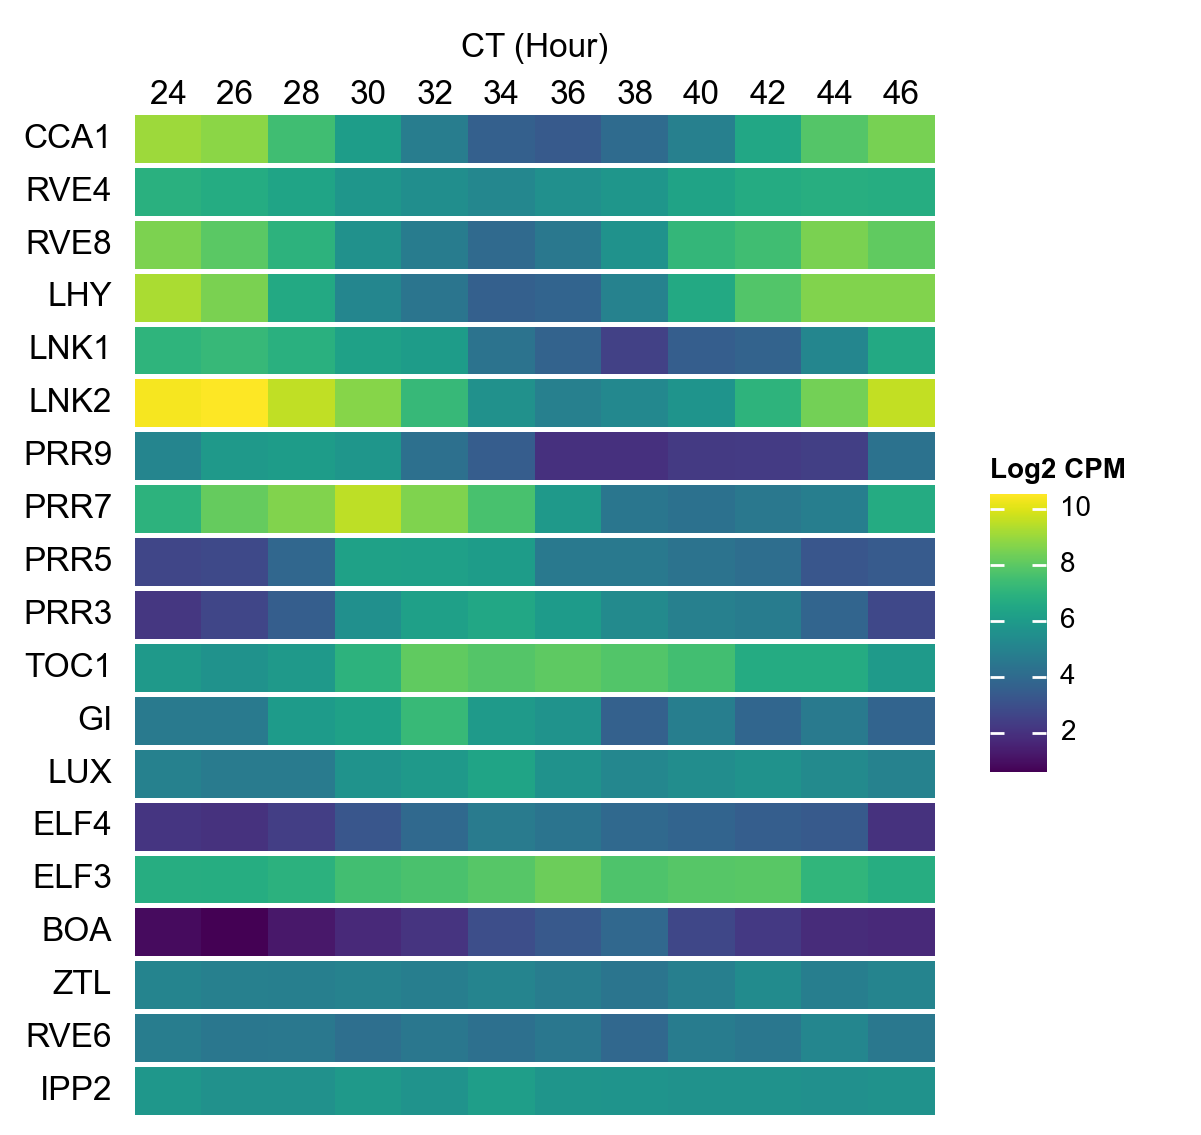

In [ ]:
h1 = utils.heatmapMultiGeneInDifferentTime(ad_mergeAllCt, 'normalize_log', dt_plotGenes.values() >> F(list), dt_plotGenes.keys() >> F(list), 'Log2 CPM', cmap='viridis', scale=False)

In [ ]:
import importlib
importlib.reload(utils)

<module 'utils' from '/public/home/liuzj/notebooks/circadian/20221122/soupX/utils.py'>

<Figure size 640x480 with 0 Axes>

{'AT5G64170': 'LNK1',
 'AT5G61380': 'TOC1',
 'AT5G60100': 'PRR3',
 'AT5G57360': 'ZTL',
 'AT5G52660': 'RVE6',
 'AT5G24470': 'PRR5',
 'AT5G02840': 'RVE4',
 'AT5G02810': 'PRR7',
 'AT3G54500': 'LNK2',
 'AT3G46640': 'LUX',
 'AT3G09600': 'RVE8',
 'AT2G46830': 'CCA1',
 'AT2G46790': 'PRR9',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3',
 'AT1G22770': 'GI',
 'AT1G01060': 'LHY'}

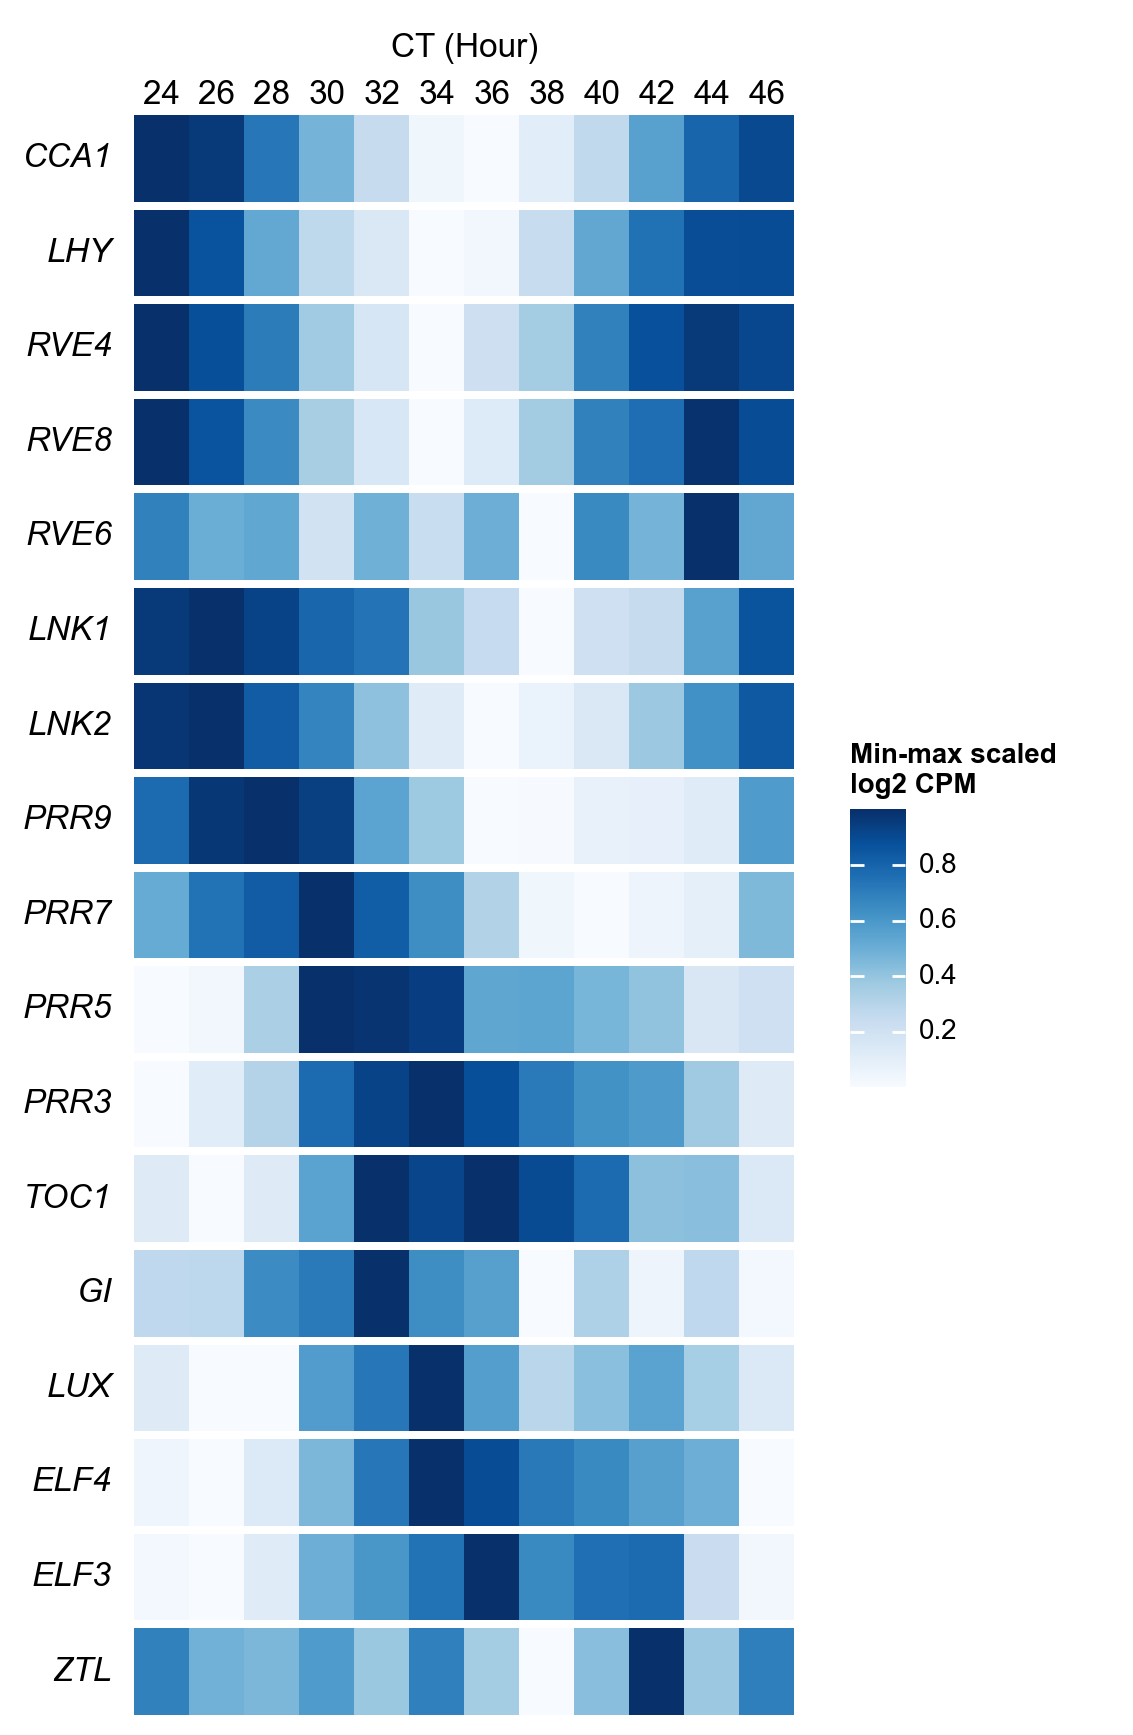

In [ ]:
h2 = utils.heatmapMultiGeneInDifferentTime(
    ad_mergeAllCt, 'normalize_log', dt_plotGenes.values() >> F(list), dt_plotGenes.keys() >> F(list), 'Min-max scaled\nlog2 CPM', cmap='Blues', scale=True, height=8
)

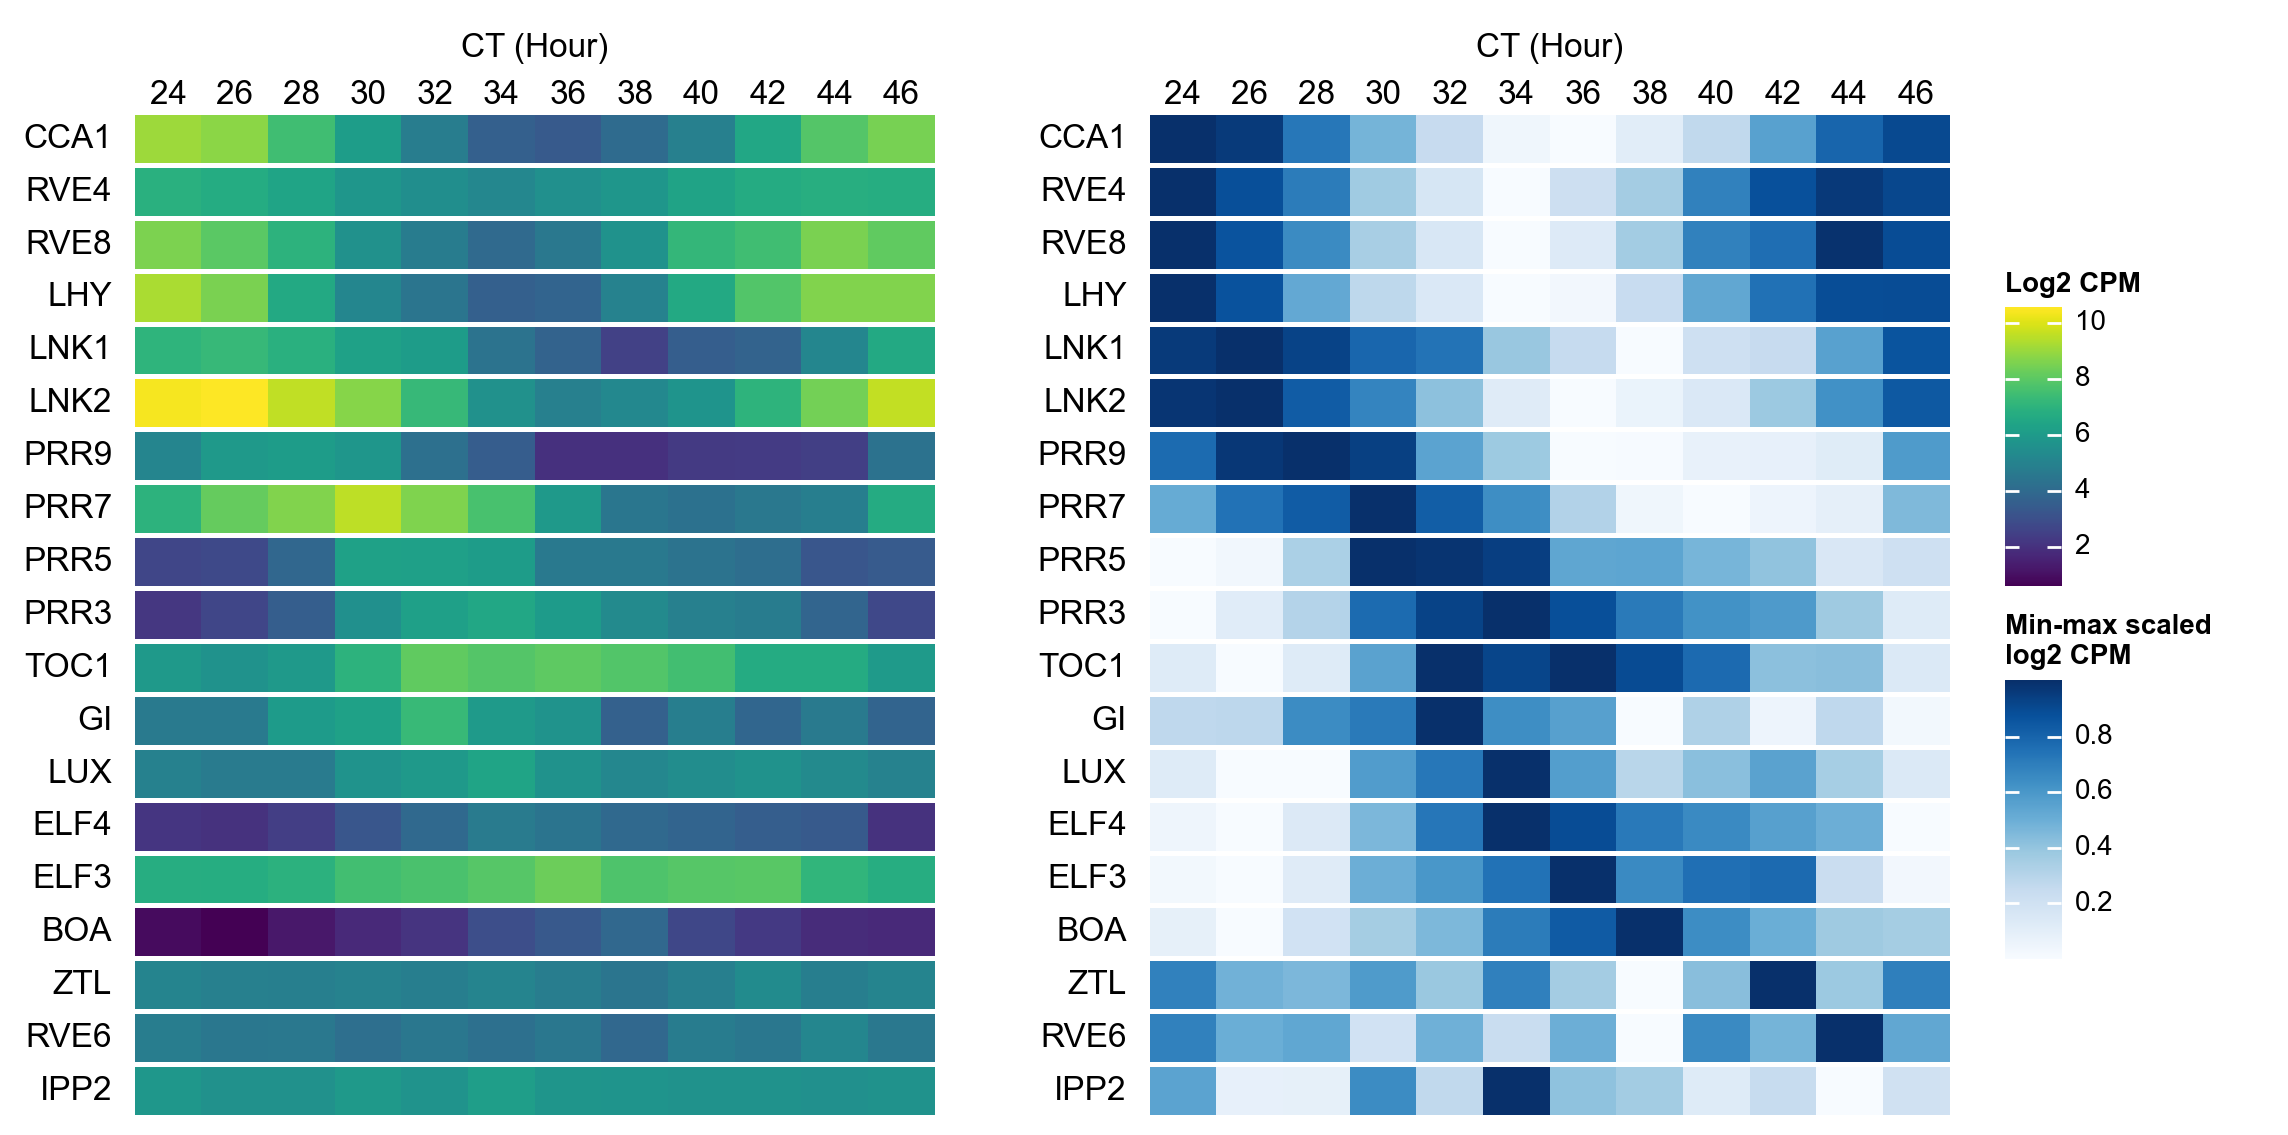

In [ ]:
h = (h1+0.5+h2)
h.add_legends()
h.render()

In [ ]:
ls_coreGenes = [
    "AT2G46830",
    "AT1G01060",
    "AT1G12910",
    "AT3G26640",
    "AT2G46790",
    "AT5G02810",
    "AT3G09600",
    "AT5G52660",
    "AT5G02840",
    "AT5G64170",
    "AT3G54500",
    "AT5G24470",
    "AT5G60100",
    "AT5G61380",
    "AT5G08330",
    "AT1G22770",
    "AT5G59570",
    "AT3G46640",
    "AT2G40080",
    "AT2G25930",
]
ls_coreGeneNames = [
    "CCA1",
    "LHY",
    "LWD1",
    "LWD2",
    "PRR9",
    "PRR7",
    "RVE8",
    "RVE6",
    "RVE4",
    "LNK1",
    "LNK2",
    "PRR5",
    "PRR3",
    "TOC1",
    "CHE",
    "GI",
    "BOA",
    "LUX",
    "ELF4",
    "ELF3",
]
dt_coreGene = dict(zip(ls_coreGenes, ls_coreGeneNames))
dt_coreGene

{'AT2G46830': 'CCA1',
 'AT1G01060': 'LHY',
 'AT1G12910': 'LWD1',
 'AT3G26640': 'LWD2',
 'AT2G46790': 'PRR9',
 'AT5G02810': 'PRR7',
 'AT3G09600': 'RVE8',
 'AT5G52660': 'RVE6',
 'AT5G02840': 'RVE4',
 'AT5G64170': 'LNK1',
 'AT3G54500': 'LNK2',
 'AT5G24470': 'PRR5',
 'AT5G60100': 'PRR3',
 'AT5G61380': 'TOC1',
 'AT5G08330': 'CHE',
 'AT1G22770': 'GI',
 'AT5G59570': 'BOA',
 'AT3G46640': 'LUX',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3'}

{'AT2G46830': 'CCA1',
 'AT1G01060': 'LHY',
 'AT2G46790': 'PRR9',
 'AT5G02810': 'PRR7',
 'AT3G09600': 'RVE8',
 'AT5G52660': 'RVE6',
 'AT5G02840': 'RVE4',
 'AT5G64170': 'LNK1',
 'AT3G54500': 'LNK2',
 'AT5G24470': 'PRR5',
 'AT5G60100': 'PRR3',
 'AT5G61380': 'TOC1',
 'AT1G22770': 'GI',
 'AT5G59570': 'BOA',
 'AT3G46640': 'LUX',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3',
 'AT5G57360': 'ZTL',
 'AT2G21320': 'BBX18',
 'AT4G38960': 'BBX19'}

In [ ]:
import legendkit
from matplotlib.legend_handler import HandlerLine2D

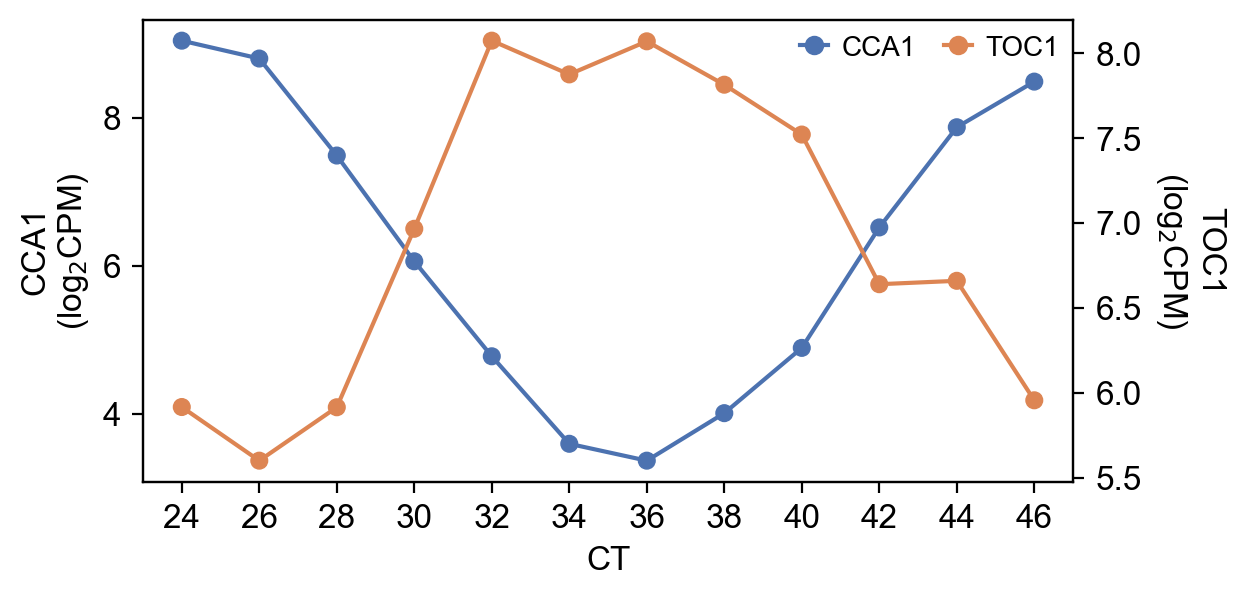

In [ ]:
_df = (
    ad_mergeAllCt[:, ["AT2G46830", "AT5G61380"]]
    .to_df("normalize_log")
    .join(ad_mergeAllCt.obs[["CT"]])
)
_df = _df.melt("CT", var_name="gene", value_name="CPM")
_df["name"] = _df["gene"].map(dt_coreGene)
fig, ax1 = plt.subplots(figsize=(6, 3))
ax2 = ax1.twinx()

(
    so.Plot(_df.query("gene=='AT2G46830'"), x="CT", y="CPM")
    .add(so.Dot(color="#4C72B0"))
    .add(so.Line(color="#4C72B0"))
    .theme(dt_snsStyle)
    .label(color="", y="CCA1\n(log$_{2}$CPM)")
    .on(ax1)
    .plot()
)

(
    so.Plot(_df.query("gene=='AT5G61380'"), x="CT", y="CPM")
    .add(so.Dot(color="#DD8553"))
    .add(so.Line(color="#DD8553"))
    .theme(dt_snsStyle)
    .label(color="", y="TOC1\n(log$_{2}$CPM)")
    .on(ax2)
    .plot()
)

legendkit.legend(
    ax2,
    loc="upper right",
    ncol=2,
    legend_items=[
        ("line", "CCA1", {"color": "#4C72B0", "marker": "o"}),
        ("line", "TOC1", {"color": "#DD8553", "marker": "o"}),
    ],
)
ax2.set_ylabel(ax2.get_ylabel(), rotation=270, labelpad=30)
plt.show()

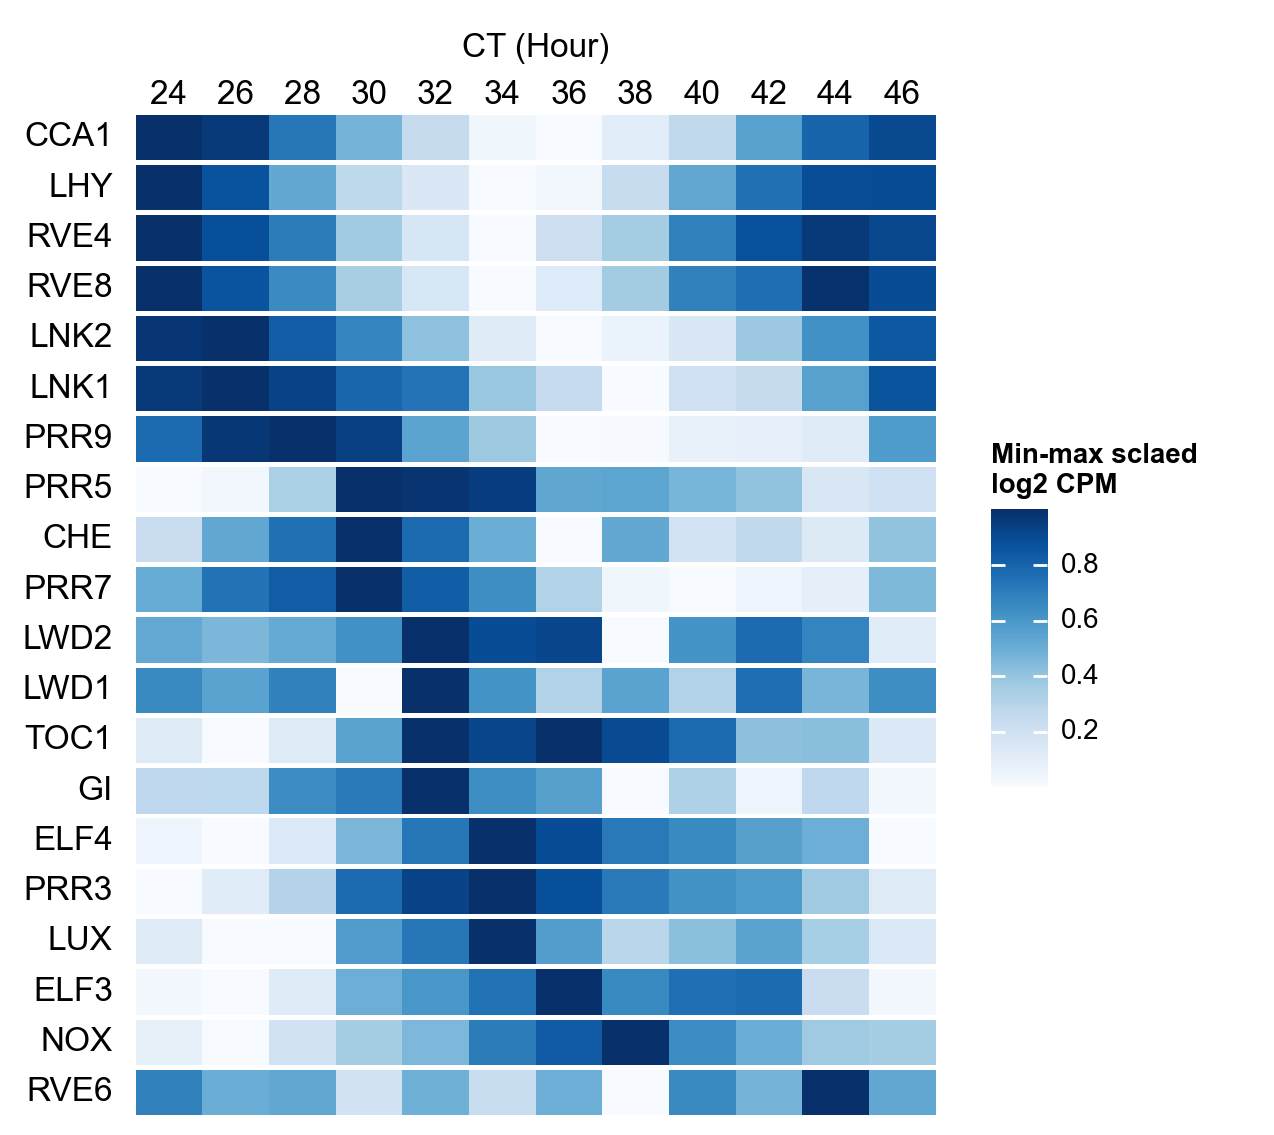

In [ ]:
import sklearn

_df = ad_mergeAllCt[:, ls_coreGenes].to_df("normalize_log").T
_df = _df.assign(temp=_df.idxmax(1)).sort_values('temp').drop(columns='temp')

_ar = sklearn.preprocessing.minmax_scale(_df, axis=1)
_df = pd.DataFrame(_ar, index=_df.index, columns=_df.columns)
# _df = _df.loc[_df.idxmax(axis=1).sort_values().index]
h1 = ma.Heatmap(
    _df.values, cmap="Blues", label="Min-max sclaed\nlog2 CPM", width=4, height=5
)
h1.hsplit(labels=_df.index, order=_df.index, spacing=0.005)
# h1.add_dendrogram('right')
h1.add_left(ma.plotter.Labels([dt_coreGene[x] for x in _df.index]), pad=0.1)
h1.add_top(ma.plotter.Labels(_df.columns, rotation=0, align="center"), pad=0.01)
h1.add_legends(
    pad=0.1,
)
h1.add_top(ma.plotter.Title("CT (Hour)"))
# h1.add_dendrogram('left', method='ward')

h1.add_legends()
h1.render()

In [ ]:
ls_coreGenes

['AT2G46830',
 'AT1G01060',
 'AT1G12910',
 'AT3G26640',
 'AT2G46790',
 'AT5G02810',
 'AT3G09600',
 'AT5G52660',
 'AT5G02840',
 'AT5G64170',
 'AT3G54500',
 'AT5G24470',
 'AT5G60100',
 'AT5G61380',
 'AT5G08330',
 'AT1G22770',
 'AT5G59570',
 'AT3G46640',
 'AT2G40080',
 'AT2G25930']

In [ ]:
dt_coreGene

{'AT2G46830': 'CCA1',
 'AT1G01060': 'LHY',
 'AT2G46790': 'PRR9',
 'AT5G02810': 'PRR7',
 'AT3G09600': 'RVE8',
 'AT5G52660': 'RVE6',
 'AT5G02840': 'RVE4',
 'AT5G64170': 'LNK1',
 'AT3G54500': 'LNK2',
 'AT5G24470': 'PRR5',
 'AT5G60100': 'PRR3',
 'AT5G61380': 'TOC1',
 'AT1G22770': 'GI',
 'AT5G59570': 'BOA',
 'AT3G46640': 'LUX',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3'}

In [ ]:
['AT2G46830',
 'AT4G38960',
 'AT2G21320',
 'AT5G02840',
 'AT3G09600',
 'AT1G01060',
 'AT5G64170',
 'AT3G54500',
 'AT2G46790',
 'AT5G02810',
 'AT5G24470',
 'AT5G60100',
 'AT5G61380',
 'AT1G22770',
 'AT3G46640',
 'AT2G40080',
 'AT2G25930',
 'AT5G59570',
 'AT5G57360',
 'AT5G52660'] >> F(lambda _: [dt_coreGene[x] for x in _])

['CCA1',
 'BBX19',
 'BBX18',
 'RVE4',
 'RVE8',
 'LHY',
 'LNK1',
 'LNK2',
 'PRR9',
 'PRR7',
 'PRR5',
 'PRR3',
 'TOC1',
 'GI',
 'LUX',
 'ELF4',
 'ELF3',
 'BOA',
 'ZTL',
 'RVE6']

In [ ]:
ls_adjOrder = ['AT2G46830',
 'AT4G38960',
 'AT2G21320',
 'AT5G02840',
 'AT3G09600',
 'AT1G01060',
 'AT5G64170',
 'AT3G54500',
 'AT2G46790',
 'AT5G02810',
 'AT5G24470',
 'AT5G60100',
 'AT5G61380',
 'AT1G22770',
 'AT3G46640',
 'AT2G40080',
 'AT2G25930',
 'AT5G59570',
 'AT5G57360',
 'AT5G52660']

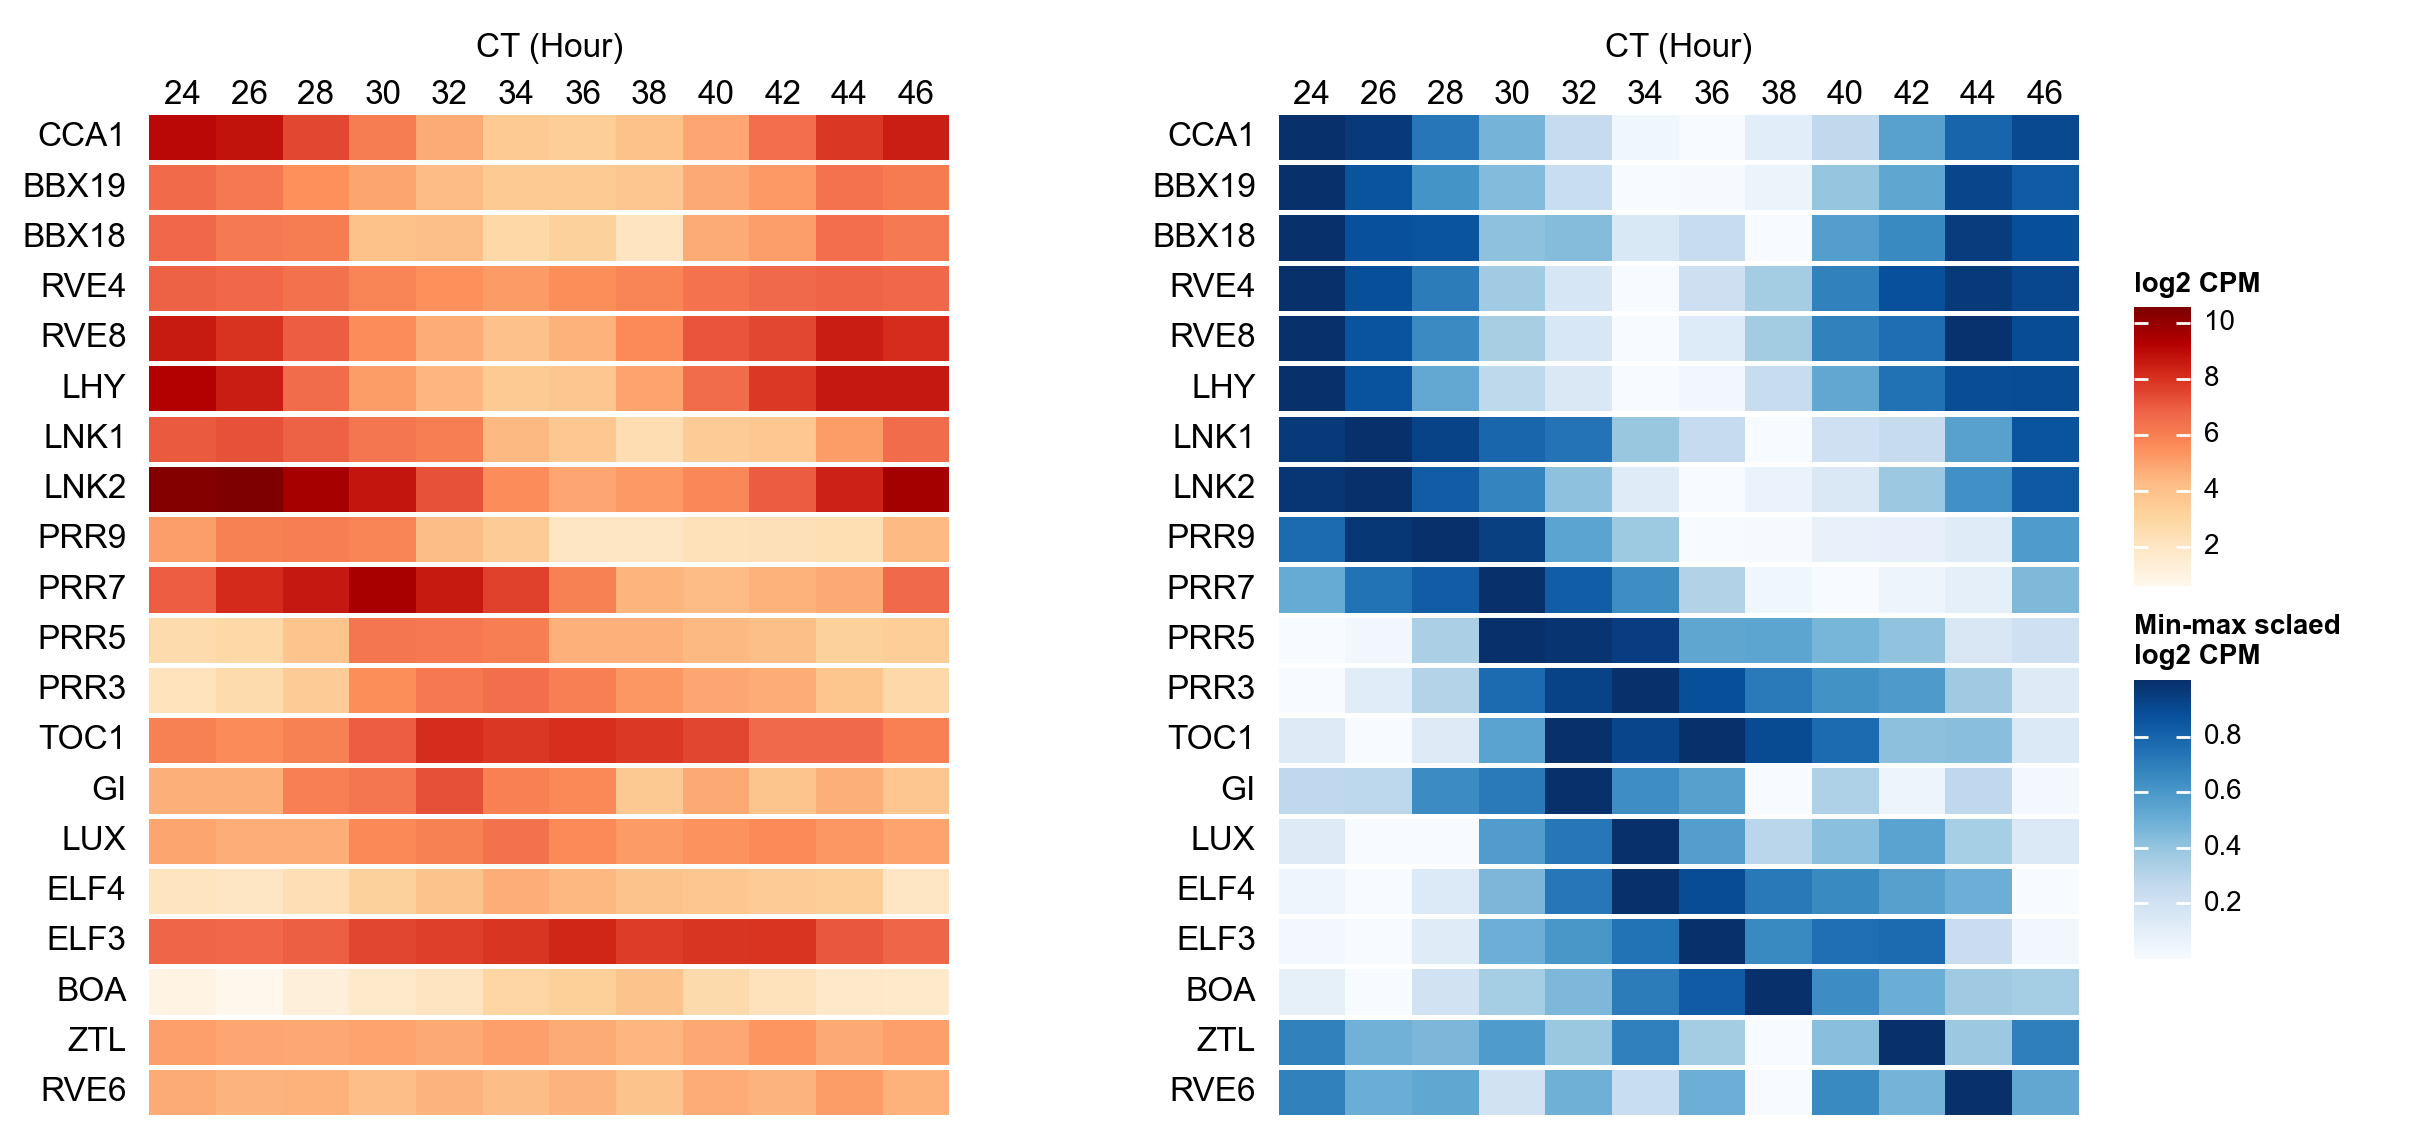

In [ ]:
# _ls = ['8:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '0:00', '2:00', '4:00', '6:00']

_df = ad_mergeAllCt[:, ls_coreGenes].to_df("normalize_log").T
_df = _df.assign(temp=_df.idxmax(1)).sort_values('temp').drop(columns='temp')
_df = _df.loc[ls_adjOrder]
# _ar = sklearn.preprocessing.minmax_scale(_df, axis=1)
# _df = pd.DataFrame(_ar, index=_df.index, columns=_df.columns)
# _df = _df.loc[_df.idxmax(axis=1).sort_values().index]

h = ma.Heatmap(_df, cmap="OrRd", label="log2 CPM", width=4, height=5)
h.hsplit(labels=_df.index, order=_df.index, spacing=0.005)
# h.add_dendrogram('right')
h.add_left(ma.plotter.Labels([dt_coreGene[x] for x in _df.index]), pad=0.1)
h.add_top(ma.plotter.Labels(_df.columns, rotation=0, align="center"), pad=0.01)
h.add_legends(
    pad=0.1,
)
h.add_top(ma.plotter.Title("CT (Hour)"))

import sklearn

_df = ad_mergeAllCt[:, ls_coreGenes].to_df("normalize_log").T
_ar = sklearn.preprocessing.minmax_scale(_df, axis=1)
_df = pd.DataFrame(_ar, index=_df.index, columns=_df.columns)
_df = _df.assign(temp=_df.idxmax(1)).sort_values('temp').drop(columns='temp')
_df = _df.loc[ls_adjOrder]

# _df = _df.loc[_df.idxmax(axis=1).sort_values().index]
h1 = ma.Heatmap(
    _df, cmap="Blues", label="Min-max sclaed\nlog2 CPM", width=4, height=5
)
h1.hsplit(labels=_df.index, order=_df.index, spacing=0.005)
# h1.add_dendrogram('right')
h1.add_left(ma.plotter.Labels([dt_coreGene[x] for x in _df.index]), pad=0.1)
h1.add_top(ma.plotter.Labels(_df.columns, rotation=0, align="center"), pad=0.01)
h1.add_legends(
    pad=0.1,
)
h1.add_top(ma.plotter.Title("CT (Hour)"))


h = h + 1 + h1
h.add_legends()
h.render()
# ax = h.get_main_ax()[0]
# ax.set_title('CT (Hour)', y=1.5)

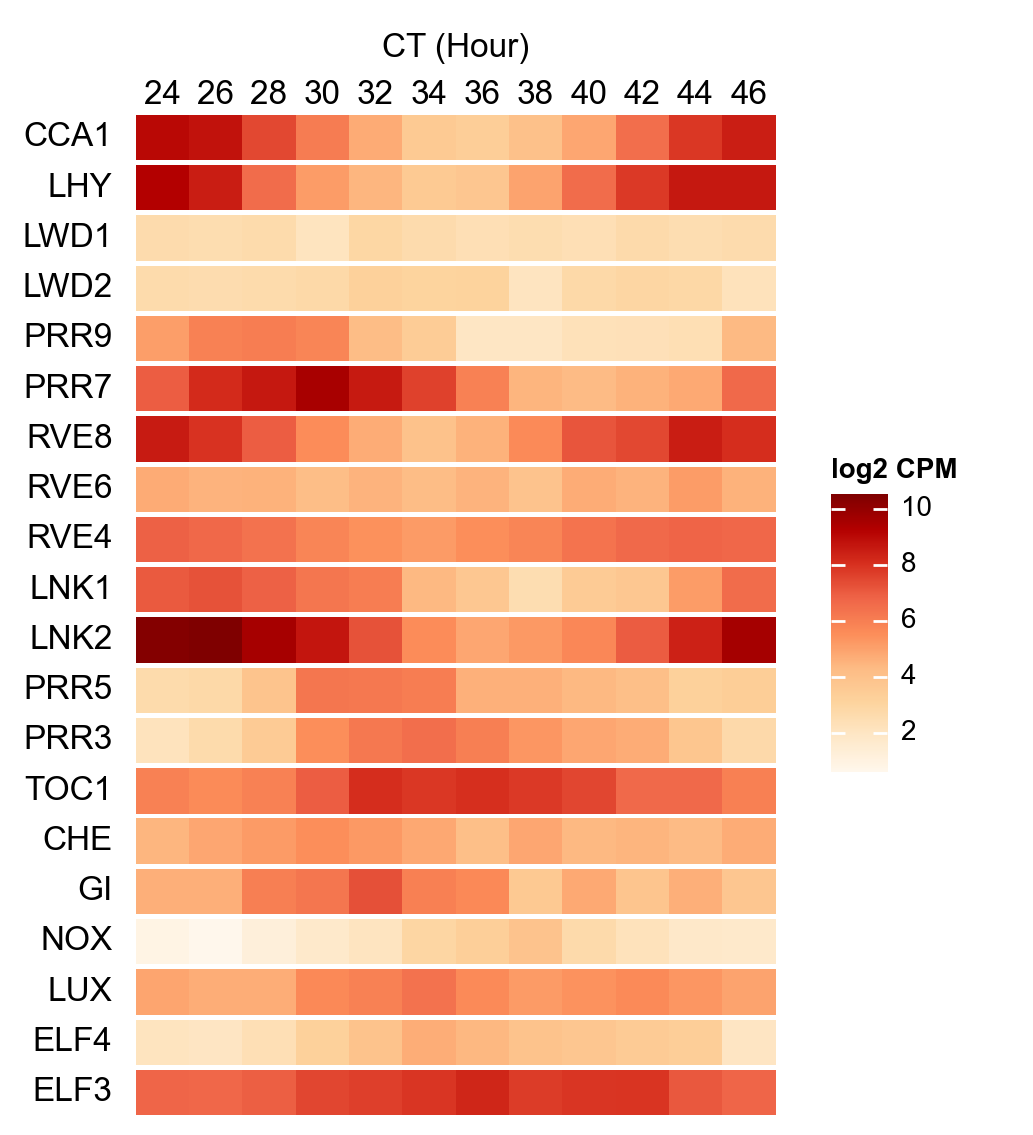

In [ ]:
# _ls = ['8:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '0:00', '2:00', '4:00', '6:00']

_df = ad_mergeAllCt[:, ls_coreGenes].to_df("normalize_log").T
# _ar = sklearn.preprocessing.minmax_scale(_df, axis=1)
# _df = pd.DataFrame(_ar, index=_df.index, columns=_df.columns)
# _df = _df.loc[_df.idxmax(axis=1).sort_values().index]

h = ma.Heatmap(_df, cmap="OrRd", label="log2 CPM", width=3.2, height=5)
h.hsplit(labels=_df.index, order=_df.index, spacing=0.005)
# h.add_dendrogram('right')
h.add_left(ma.plotter.Labels([dt_coreGene[x] for x in _df.index]), pad=0.1)
h.add_top(ma.plotter.Labels(_df.columns, rotation=0, align="center"), pad=0.01)
h.add_legends(
    pad=0.1,
)
h.add_top(ma.plotter.Title("CT (Hour)"))

# import sklearn
# _df = ad_mergeAllCt[:, ls_coreGenes].to_df('normalize_log').T
# _ar = sklearn.preprocessing.minmax_scale(_df, axis=1)
# _df = pd.DataFrame(_ar, index=_df.index, columns=_df.columns)
# # _df = _df.loc[_df.idxmax(axis=1).sort_values().index]
# h1 = ma.Heatmap(_df, cmap='Blues', label="Min-max sclaed\nlog2 CPM", width=3.2, height=5)
# h1.hsplit(labels=_df.index, order=_df.index, spacing=0.005)
# # h1.add_dendrogram('right')
# h1.add_left(ma.plotter.Labels([dt_coreGene[x] for x in _df.index]), pad=0.1)
# h1.add_top(ma.plotter.Labels(_df.columns, rotation=0, align='center'), pad=0.01)
# h1.add_legends(pad=.1, )
# h1.add_top(ma.plotter.Title('CT (Hour)'))


# h = (h + .2 + h1)
h.add_legends()
h.render()
# ax = h.get_main_ax()[0]
# ax.set_title('CT (Hour)', y=1.5)

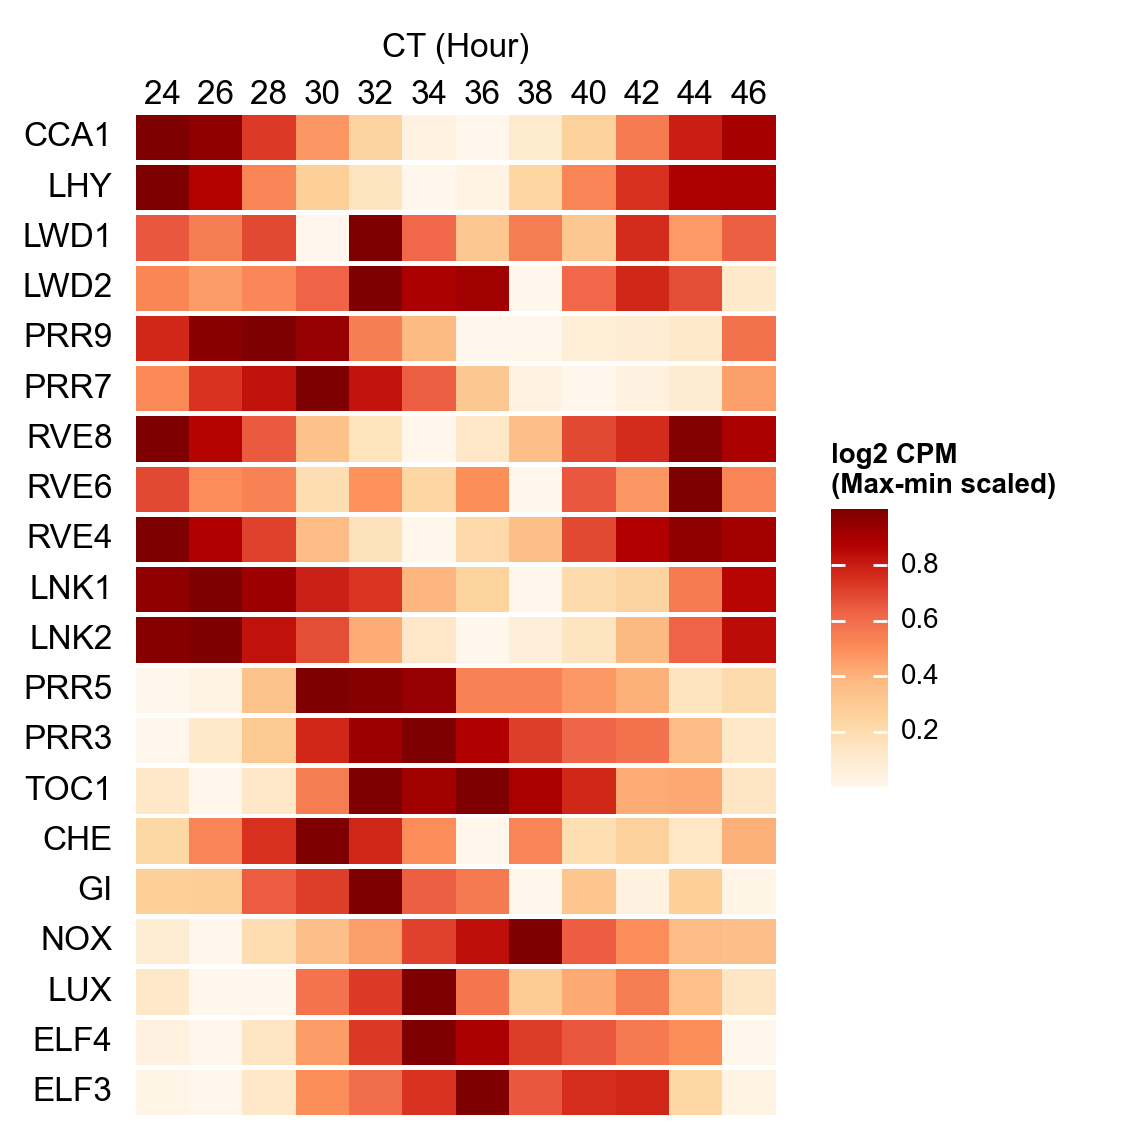

In [ ]:
# _ls = ['8:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '0:00', '2:00', '4:00', '6:00']

_df = ad_mergeAllCt[:, ls_coreGenes].to_df("normalize_log").T
_df = _df.apply(lambda _: (_ - _.min()) / (_.max() - _.min()), axis=1)

# _ar = sklearn.preprocessing.minmax_scale(_df, axis=1)
# _df = pd.DataFrame(_ar, index=_df.index, columns=_df.columns)
# _df = _df.loc[_df.idxmax(axis=1).sort_values().index]

h = ma.Heatmap(_df, cmap="OrRd", label="log2 CPM\n(Max-min scaled)", width=3.2, height=5)
h.hsplit(labels=_df.index, order=_df.index, spacing=0.005)
# h.add_dendrogram('right')
h.add_left(ma.plotter.Labels([dt_coreGene[x] for x in _df.index]), pad=0.1)
h.add_top(ma.plotter.Labels(_df.columns, rotation=0, align="center"), pad=0.01)
h.add_legends(
    pad=0.1,
)
h.add_top(ma.plotter.Title("CT (Hour)"))

# import sklearn
# _df = ad_mergeAllCt[:, ls_coreGenes].to_df('normalize_log').T
# _ar = sklearn.preprocessing.minmax_scale(_df, axis=1)
# _df = pd.DataFrame(_ar, index=_df.index, columns=_df.columns)
# # _df = _df.loc[_df.idxmax(axis=1).sort_values().index]
# h1 = ma.Heatmap(_df, cmap='Blues', label="Min-max sclaed\nlog2 CPM", width=3.2, height=5)
# h1.hsplit(labels=_df.index, order=_df.index, spacing=0.005)
# # h1.add_dendrogram('right')
# h1.add_left(ma.plotter.Labels([dt_coreGene[x] for x in _df.index]), pad=0.1)
# h1.add_top(ma.plotter.Labels(_df.columns, rotation=0, align='center'), pad=0.01)
# h1.add_legends(pad=.1, )
# h1.add_top(ma.plotter.Title('CT (Hour)'))


# h = (h + .2 + h1)
h.add_legends()
h.render()
# ax = h.get_main_ax()[0]
# ax.set_title('CT (Hour)', y=1.5)